In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# setando df inteiro. 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def resumo_tabela(df):
    print(f"Dataset Shape: {df.shape}")
    sumario = pd.DataFrame(df.dtypes,columns=['dtypes'])
    sumario = sumario.reset_index()
    sumario['Name'] = sumario['index']
    sumario = sumario[['Name','dtypes']]
    sumario['Missing'] = df.isnull().sum().values    
    sumario['Uniques'] = df.nunique().values
    sumario['First Value'] = df.loc[0].values
    sumario['Last Value'] = df.iloc[-1, :].values
    

    for name in sumario['Name'].value_counts().index:
        sumario.loc[sumario['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return sumario

In [4]:
caminho_csv = 'C:/Users/User/Desktop/EntregasDD-05/adahack-2024-dados/base_dados/Base_Caio.csv'
df = pd.read_csv(caminho_csv)

In [5]:
df.head()

,id,Nome,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,Senioridade,Idade Inicial
0,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34,pardo,Ensino Médio,Santa Catarina,12,Compras,Analista Pleno,22
1,2,Elisângela Gabrielle de Osório,Fem,26,pardo,Ensino Médio,Pará,6,Contabilidade,Analista Júnior,20
2,3,José Túlio de Cabral,Masc,35,pardo,Ensino Médio,Santa Catarina,5,Vendas,Analista Pleno,30
3,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24,pardo,Ensino Superior,Tocantins,4,Administrativo,Gerente,20
4,5,Fagner Josiel dos Santos,Masc,21,pardo,Ensino Superior,Ceará,5,Recursos Humanos,Analista Júnior,16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             9944 non-null   int64 
 1   Nome           9944 non-null   object
 2   Genero         9944 non-null   object
 3   Idade          9944 non-null   int64 
 4   Raça           9944 non-null   object
 5   Formação       9944 non-null   object
 6   Estado         9944 non-null   object
 7   Tempo de casa  9944 non-null   int64 
 8   Departamento   9944 non-null   object
 9   Senioridade    9944 non-null   object
 10  Idade Inicial  9944 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 854.7+ KB


In [7]:
df.columns

Index(['id', 'Nome', 'Genero', 'Idade', 'Raça', 'Formação', 'Estado',
       'Tempo de casa', 'Departamento', 'Senioridade', 'Idade Inicial'],
      dtype='object')

In [8]:
df_IBGE = pd.read_csv('Base_IBGE.csv')
df_SoD_EC = pd.read_csv('Base_Sod_raca_cargo.csv')
df_SoD_GC = pd.read_csv('Base_SoD_Genero_cargo.csv')
df_SoD_Gen = pd.read_csv('Base_SoD_Genero.csv')
DF_IBGE_SoD_raca = pd.read_csv('Base_IBGE_SoD_raca.csv')
df_IBGE_SoD_Genero = pd.read_csv('Base_IBGE_SoD_Genero.csv')

In [9]:
display(df_IBGE)

,fatores,categoria,ref_absoluta,ref_%
0,masculino,genero,98.532.431,"48,50%"
1,feminino,genero,104.548.325,"51,50%"
2,pardo,racial,92.083.286,"45,30%"
3,preto,racial,20.656.458,"10,20%"
4,branco,racial,88.252.121,"43,50%"
5,amarelo,racial,850.130,"0,40%"
6,indígena,racial,1.227.642,"0,60%"


In [10]:
display(df_SoD_EC)

,Nível de Cargo,Branca,Parda,Preta,Amarela,Indígena/Outra
0,Júnior,72.0%,21.5%,3.3%,0.9%,2.3%
1,Pleno,60.7%,26.5%,6.8%,3.3%,2.7%
2,Sênior,63.7%,21.5%,7.2%,6.4%,1.2%
3,Gestor,67.9%,19.6%,6.4%,5.1%,1.0%
4,Total,65.2%,23.1%,6.2%,4.1%,1.4%


In [11]:
display(df_SoD_GC)

,Nível de Cargo,Feminino,Masculino
0,Júnior,"28,60%","71,00%"
1,Pleno,"24,10%","75,30%"
2,Sênior,"21,60%","77,90%"
3,Gestor,"18,70%","81,10%"
4,Total,"23,20%","76,80%"


In [12]:
display(df_SoD_Gen)

,fatores,categoria,ref_absoluta,ref_%
0,masculino,genero,NaN,"76,20%"
1,feminino,genero,NaN,"23,80%"
2,pardo,racial,NaN,"24,00%"
3,preto,racial,NaN,"7,10%"
4,branco,racial,NaN,"65,50%"
5,amarelo,racial,NaN,"2,38%"
6,indígena,racial,NaN,"1,02%"


In [13]:
# Agrupando por gênero e senioridade
dados_agrupados = df.groupby(['Genero', 'Senioridade'])

# Contando o número de funcionários em cada grupo
contagem_funcionarios = dados_agrupados.size().reset_index(name='Contagem')


# Calculando a porcentagem
contagem_funcionarios['Porcentagem'] = contagem_funcionarios['Contagem'] / contagem_funcionarios['Contagem'].sum() * 100

# Formatando o DataFrame final
df_genero_senioridade = contagem_funcionarios[['Genero', 'Senioridade', 'Contagem', 'Porcentagem']]

display(df_genero_senioridade)


,Genero,Senioridade,Contagem,Porcentagem
0,Fem,Analista Júnior,775,7.793644
1,Fem,Analista Pleno,640,6.436042
2,Fem,Analista Sênior,493,4.957763
3,Fem,Diretor,11,0.110619
4,Fem,Estagiário,204,2.051488
5,Fem,Gerente,365,3.670555
6,Masc,Analista Júnior,2210,22.224457
7,Masc,Analista Pleno,1847,18.574014
8,Masc,Analista Sênior,1497,15.054304
9,Masc,Diretor,77,0.774336


In [14]:
# Contagem de pessoas por gênero
contagem_genero = df['Genero'].value_counts()
total_pessoas = len(df)

# Porcentagem de pessoas por gênero
porcentagem_genero = (contagem_genero / total_pessoas) * 100

# Contagem de pessoas por gênero e senioridade
contagem_genero_senioridade = df.groupby(['Genero', 'Senioridade']).size()

# Porcentagem de pessoas por gênero e senioridade
porcentagem_genero_senioridade = (contagem_genero_senioridade / total_pessoas) * 100

display("Quantidade de pessoas por gênero:")
display(contagem_genero)
display("\nPorcentagem de pessoas por gênero:")
display(porcentagem_genero)

display("\nQuantidade de pessoas por gênero e senioridade:")
display(contagem_genero_senioridade)
display("\nPorcentagem de pessoas por gênero e senioridade:")
display(porcentagem_genero_senioridade)

'Quantidade de pessoas por gênero:'

Genero
Masc    7456
Fem     2488
Name: count, dtype: int64

'\nPorcentagem de pessoas por gênero:'

Genero
Masc    74.979887
Fem     25.020113
Name: count, dtype: float64

'\nQuantidade de pessoas por gênero e senioridade:'

Genero  Senioridade    
Fem     Analista Júnior     775
        Analista Pleno      640
        Analista Sênior     493
        Diretor              11
        Estagiário          204
        Gerente             365
Masc    Analista Júnior    2210
        Analista Pleno     1847
        Analista Sênior    1497
        Diretor              77
        Estagiário          690
        Gerente            1135
dtype: int64

'\nPorcentagem de pessoas por gênero e senioridade:'

Genero  Senioridade    
Fem     Analista Júnior     7.793644
        Analista Pleno      6.436042
        Analista Sênior     4.957763
        Diretor             0.110619
        Estagiário          2.051488
        Gerente             3.670555
Masc    Analista Júnior    22.224457
        Analista Pleno     18.574014
        Analista Sênior    15.054304
        Diretor             0.774336
        Estagiário          6.938858
        Gerente            11.413918
dtype: float64

In [15]:
display(df_IBGE_SoD_Genero)

,Unnamed: 0.1,Unnamed: 0,entidade,feminino,masculino
0,0,0.0,IBGE,"51,50%","48,50%"
1,1,1.0,SoD,"23,80%","76,20%"
2,2,2.0,Empresa,25.02%,74.98%
3,3,NaN,Empresa,25.02%,74.98%


In [16]:
df_IBGE_SoD_Genero.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'entidade', 'feminino', 'masculino'], dtype='object')

# Calculando e genero

In [17]:


# Verificar se df_IBGE_SoD_Genero é um DataFrame do pandas
if isinstance(df_IBGE_SoD_Genero, pd.DataFrame):
    # Calcular as porcentagens de homens e mulheres no dataframe df
    contagem_genero = df['Genero'].value_counts()
    total_pessoas = len(df)
    porcentagem_feminino = (contagem_genero.get('Fem', 0) / total_pessoas) * 100
    porcentagem_masculino = (contagem_genero.get('Masc', 0) / total_pessoas) * 100

    # Adicionar uma nova linha com as porcentagens de gênero ao dataframe df_IBGE_SoD_Genero
    nova_linha = {
        'entidade': 'Empresa',
        'feminino': f"{porcentagem_feminino:.2f}%",
        'masculino': f"{porcentagem_masculino:.2f}%"
    }

    # Converter nova_linha para DataFrame
    nova_linha_df = pd.DataFrame([nova_linha])

    # Adicionar nova_linha_df ao df_IBGE_SoD_Genero
    df_IBGE_SoD_Genero = pd.concat([df_IBGE_SoD_Genero, nova_linha_df], ignore_index=True)

    print(df_IBGE_SoD_Genero)
else:
    print("O objeto df_IBGE_SoD_Genero não é um DataFrame do pandas.")



   Unnamed: 0.1  Unnamed: 0 entidade feminino masculino
0           0.0         0.0     IBGE   51,50%    48,50%
1           1.0         1.0      SoD   23,80%    76,20%
2           2.0         2.0  Empresa   25.02%    74.98%
3           3.0         NaN  Empresa   25.02%    74.98%
4           NaN         NaN  Empresa   25.02%    74.98%


In [18]:
display(df_IBGE_SoD_Genero)

,Unnamed: 0.1,Unnamed: 0,entidade,feminino,masculino
0,0.0,0.0,IBGE,"51,50%","48,50%"
1,1.0,1.0,SoD,"23,80%","76,20%"
2,2.0,2.0,Empresa,25.02%,74.98%
3,3.0,NaN,Empresa,25.02%,74.98%
4,NaN,NaN,Empresa,25.02%,74.98%


In [19]:
#Base_SoD_Genero.csv
df_IBGE_SoD_Genero.to_csv('Base_IBGE_SoD_Genero.csv')

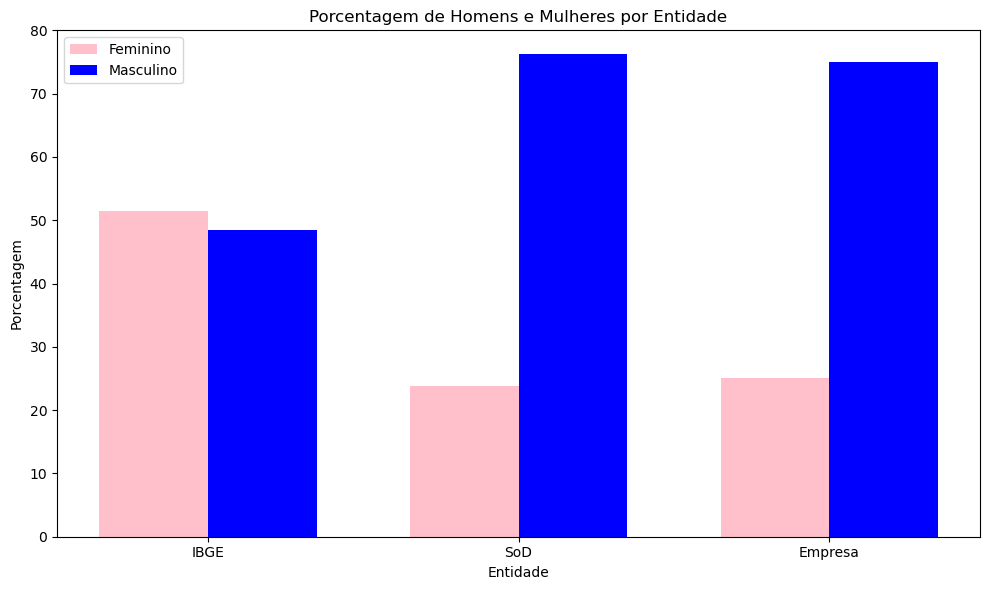

In [20]:
import matplotlib.pyplot as plt

# Dados do dataframe df_IBGE_SoD_Genero
entidades = ['IBGE', 'SoD', 'Empresa']
porcentagem_feminino = [51.50, 23.80, 25.02]
porcentagem_masculino = [48.50, 76.20, 74.98]

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras para as porcentagens de feminino e masculino
bar_width = 0.35
index = range(len(entidades))
bar1 = ax.bar(index, porcentagem_feminino, bar_width, label='Feminino', color='pink')
bar2 = ax.bar([i + bar_width for i in index], porcentagem_masculino, bar_width, label='Masculino', color='blue')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Entidade')
ax.set_ylabel('Porcentagem')
ax.set_title('Porcentagem de Homens e Mulheres por Entidade')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(entidades)
ax.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# Caculando genero por senioridade 

In [21]:
display(df_SoD_GC)

,Nível de Cargo,Feminino,Masculino
0,Júnior,"28,60%","71,00%"
1,Pleno,"24,10%","75,30%"
2,Sênior,"21,60%","77,90%"
3,Gestor,"18,70%","81,10%"
4,Total,"23,20%","76,80%"


In [22]:
import pandas as pd

# Supondo que você já tenha o dataframe principal df


# Calcular a contagem de homens e mulheres para cada senioridade
contagem_genero_senioridade = df.groupby(['Senioridade', 'Genero']).size()

# Calcular o total de pessoas para cada senioridade
total_senioridade = df['Senioridade'].value_counts()

# Calcular a porcentagem de homens e mulheres para cada senioridade
porcentagem_genero_senioridade = (contagem_genero_senioridade / total_senioridade) * 100

# Criar um novo dataframe com os resultados
data_resultado = {
    'Nível de Cargo': [],
    'Feminino': [],
    'Masculino': []
}

for senioridade in df['Senioridade'].unique():
    data_resultado['Nível de Cargo'].append(senioridade)
    data_resultado['Feminino'].append(f"{porcentagem_genero_senioridade.get((senioridade, 'Fem'), 0):.2f}%")
    data_resultado['Masculino'].append(f"{porcentagem_genero_senioridade.get((senioridade, 'Masc'), 0):.2f}%")

# Calcular os totais
total_feminino = (df['Genero'] == 'Fem').sum()
total_masculino = (df['Genero'] == 'Masc').sum()
total_pessoas = len(df)

# Adicionar o total ao resultado
data_resultado['Nível de Cargo'].append('Total')
data_resultado['Feminino'].append(f"{(total_feminino / total_pessoas) * 100:.2f}%")
data_resultado['Masculino'].append(f"{(total_masculino / total_pessoas) * 100:.2f}%")

# Criar o dataframe resultado
df_Distribuicao_GeneroporCargo = pd.DataFrame(data_resultado)

display(df_Distribuicao_GeneroporCargo)


,Nível de Cargo,Feminino,Masculino
0,Analista Pleno,25.73%,74.27%
1,Analista Júnior,25.96%,74.04%
2,Gerente,24.33%,75.67%
3,Analista Sênior,24.77%,75.23%
4,Estagiário,22.82%,77.18%
5,Diretor,12.50%,87.50%
6,Total,25.02%,74.98%


In [29]:
df.head()

,id,Nome,Genero,Idade,Raça,Formação,Estado,Tempo de casa,Departamento,senioridade,Idade Inicial
0,1,Eleonora Arilda Penedo Gomes de Padilha,Fem,34,pardo,Ensino Médio,Santa Catarina,12,Compras,Analista Pleno,22
1,2,Elisângela Gabrielle de Osório,Fem,26,pardo,Ensino Médio,Pará,6,Contabilidade,Analista Júnior,20
2,3,José Túlio de Cabral,Masc,35,pardo,Ensino Médio,Santa Catarina,5,Vendas,Analista Pleno,30
3,4,Ezequiel Edivaldo de Medeiros Sonao,Masc,24,pardo,Ensino Superior,Tocantins,4,Administrativo,Gestor,20
4,5,Fagner Josiel dos Santos,Masc,21,pardo,Ensino Superior,Ceará,5,Recursos Humanos,Analista Júnior,16


In [23]:
df_Distribuicao_GeneroporCargo.to_csv('Base_GC.csv')

In [32]:
df['Senioridade'] = df['Senioridade'].replace(['Gerente', 'Diretor'], 'Gestor')

In [35]:
# Calcular a contagem de homens e mulheres para cada senioridade
contagem_genero_senioridade = df.groupby(['Senioridade', 'Genero']).size()

# Calcular o total de pessoas para cada senioridade
total_senioridade = df['Senioridade'].value_counts()

# Calcular a porcentagem de homens e mulheres para cada senioridade
porcentagem_genero_senioridade = (contagem_genero_senioridade / total_senioridade) * 100

# Criar um novo dataframe com os resultados
data_resultado = {
    'Nível de Cargo': [],
    'Feminino': [],
    'Masculino': []
}

for senioridade in df['Senioridade'].unique():
    data_resultado['Nível de Cargo'].append(senioridade)
    data_resultado['Feminino'].append(f"{porcentagem_genero_senioridade.get((senioridade, 'Fem'), 0):.2f}%")
    data_resultado['Masculino'].append(f"{porcentagem_genero_senioridade.get((senioridade, 'Masc'), 0):.2f}%")

# Calcular os totais
total_feminino = (df['Genero'] == 'Fem').sum()
total_masculino = (df['Genero'] == 'Masc').sum()
total_pessoas = len(df)

# Adicionar o total ao resultado
data_resultado['Nível de Cargo'].append('Total')
data_resultado['Feminino'].append(f"{(total_feminino / total_pessoas) * 100:.2f}%")
data_resultado['Masculino'].append(f"{(total_masculino / total_pessoas) * 100:.2f}%")

# Criar o dataframe resultado
df_resultado = pd.DataFrame(data_resultado)

display(df_resultado)

,Nível de Cargo,Feminino,Masculino
0,Analista Pleno,25.73%,74.27%
1,Analista Júnior,25.96%,74.04%
2,Gestor,23.68%,76.32%
3,Analista Sênior,24.77%,75.23%
4,Estagiário,22.82%,77.18%
5,Total,25.02%,74.98%


In [36]:
df_resultado['Nível de Cargo'] = df_resultado['Nível de Cargo'].replace({'Analista Pleno': 'Pleno',
                                                                        'Analista Júnior': 'Júnior',
                                                                        'Analista Sênior': 'Sênior'})

df_resultado = df_resultado.drop(df_resultado.index[4:])

display(df_resultado)

,Nível de Cargo,Feminino,Masculino
0,Pleno,25.73%,74.27%
1,Júnior,25.96%,74.04%
2,Gestor,23.68%,76.32%
3,Sênior,24.77%,75.23%


In [37]:
# Crianda DF de Genero por Cargo baseado na

Genero_porCargo_Sod = {
    'Nível de Cargo': ['Júnior', 'Pleno', 'Sênior', 'Gestor'],
    'Feminino': ['28,60%', '24,10%', '21,60%', '18,70%'],
    'Masculino': ['71,00%', '75,30%', '77,90%', '81,10%']
}

df_Genero_porCargo_Sod = pd.DataFrame(Genero_porCargo_Sod)

print(df_Genero_porCargo_Sod)

  Nível de Cargo Feminino Masculino
0         Júnior   28,60%    71,00%
1          Pleno   24,10%    75,30%
2         Sênior   21,60%    77,90%
3         Gestor   18,70%    81,10%


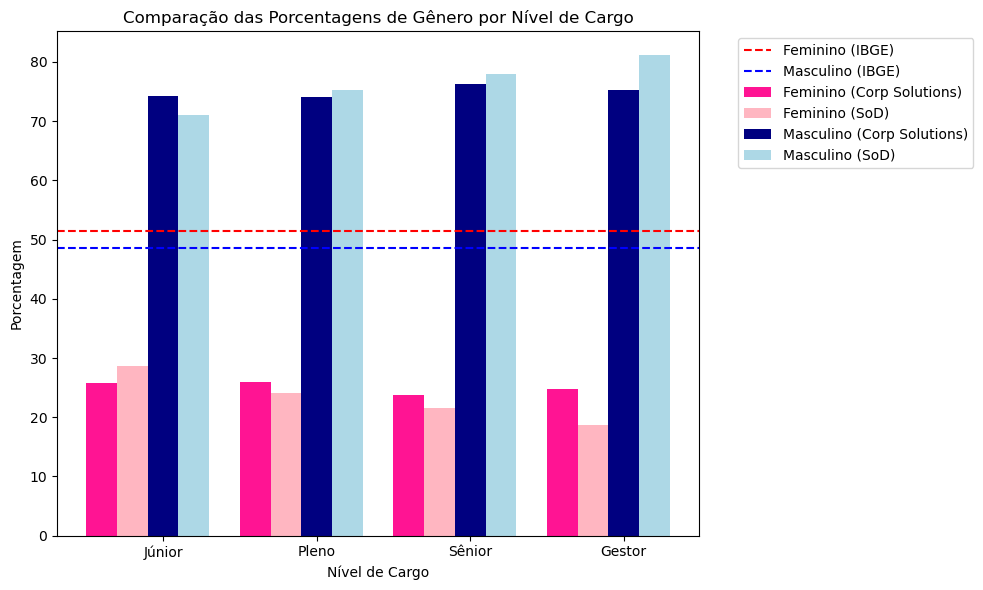

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Dados dos DataFrames df_resultado e df_Genero_porCargo_Sod
niveis_de_cargo = df_resultado['Nível de Cargo']
feminino_df_resultado = df_resultado['Feminino'].str.rstrip('%').str.replace(',', '.').astype(float)
masculino_df_resultado = df_resultado['Masculino'].str.rstrip('%').str.replace(',', '.').astype(float)

feminino_df_Genero_porCargo_Sod = df_Genero_porCargo_Sod['Feminino'].str.rstrip('%').str.replace(',', '.').astype(float)
masculino_df_Genero_porCargo_Sod = df_Genero_porCargo_Sod['Masculino'].str.rstrip('%').str.replace(',', '.').astype(float)

# Reorganizar os dados
niveis_de_cargo_reordered = ['Júnior', 'Pleno', 'Sênior', 'Gestor']
feminino_df_resultado_reordered = feminino_df_resultado[niveis_de_cargo.isin(niveis_de_cargo_reordered)]
masculino_df_resultado_reordered = masculino_df_resultado[niveis_de_cargo.isin(niveis_de_cargo_reordered)]
feminino_df_Genero_porCargo_Sod_reordered = feminino_df_Genero_porCargo_Sod[niveis_de_cargo.isin(niveis_de_cargo_reordered)]
masculino_df_Genero_porCargo_Sod_reordered = masculino_df_Genero_porCargo_Sod[niveis_de_cargo.isin(niveis_de_cargo_reordered)]

# Largura das barras
bar_width = 0.2

# Posição das barras
index = np.arange(len(niveis_de_cargo_reordered))

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras para as porcentagens de feminino
bar1 = ax.bar(index - bar_width, feminino_df_resultado_reordered, bar_width, label='Feminino (Corp Solutions)', color='deeppink')
bar2 = ax.bar(index, feminino_df_Genero_porCargo_Sod_reordered, bar_width, label='Feminino (SoD)', color='lightpink')

# Plotar as barras para as porcentagens de masculino
bar3 = ax.bar(index + bar_width, masculino_df_resultado_reordered, bar_width, label='Masculino (Corp Solutions)', color='navy')
bar4 = ax.bar(index + 2*bar_width, masculino_df_Genero_porCargo_Sod_reordered, bar_width, label='Masculino (SoD)', color='lightblue')

# Adicionar as linhas para os dados do IBGE
ax.axhline(y=51.50, color='red', linestyle='--', label='Feminino (IBGE)')
ax.axhline(y=48.50, color='blue', linestyle='--', label='Masculino (IBGE)')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Nível de Cargo')
ax.set_ylabel('Porcentagem')
ax.set_title('Comparação das Porcentagens de Gênero por Nível de Cargo')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(niveis_de_cargo_reordered)

# Posicionar a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Exploração de Raça

In [45]:
df['Raça'].unique()

array(['pardo', 'preto', 'branco', 'indígena', 'amarelo'], dtype=object)

In [44]:
# Substituir 'indí\xadgena' por 'indígena' na coluna 'Raça'
df['Raça'] = df['Raça'].replace('indí\xadgena', 'indígena', regex=True)


In [51]:
import pandas as pd

# Calcular a contagem de cada raça para cada nível de cargo
contagem_racas_por_cargo = df.groupby(['Senioridade', 'Raça']).size().unstack(fill_value=0)

# Calcular o total de pessoas para cada nível de cargo
total_por_cargo = df['Senioridade'].value_counts()

# Calcular a porcentagem de cada raça para cada nível de cargo
porcentagem_racas_por_cargo = (contagem_racas_por_cargo.div(total_por_cargo, axis=0) * 100).round(2)

# Adicionar uma linha para o total de cada raça
total_racas = df['Raça'].value_counts()
total_por_raca = total_racas.sum()
total_por_raca_serie = pd.Series(total_racas / total_por_raca * 100, name='Total').round(2)
porcentagem_racas_por_cargo = pd.concat([porcentagem_racas_por_cargo, total_por_raca_serie.to_frame().T])

# Resetar o índice para ter 'Nível de Cargo' como uma coluna
porcentagem_racas_por_cargo.reset_index(inplace=True)
porcentagem_racas_por_cargo.rename_axis(columns={'index': 'Nível de Cargo'}, inplace=True)

# Renomear as colunas
porcentagem_racas_por_cargo.rename(columns={'pardo': 'Pardo', 'preto': 'Preto', 'branco': 'Branco', 'indígena': 'Indígena', 'amarelo': 'Amarelo'}, inplace=True)

display(porcentagem_racas_por_cargo)


Raça,index,Amarelo,Branco,Indígena,Pardo,Preto
0,Analista Júnior,0.44,42.28,0.44,47.54,9.31
1,Analista Pleno,0.52,44.55,0.40,45.88,8.64
2,Analista Sênior,0.90,43.17,0.55,46.23,9.15
3,Estagiário,0.22,41.50,0.45,47.76,10.07
4,Gestor,0.25,41.31,0.57,49.94,7.93
5,Total,0.50,42.80,0.47,47.26,8.96


In [64]:
# Calcular a contagem de cada raça para cada nível de cargo
contagem_racas_por_cargo = df.groupby(['Senioridade', 'Raça']).size().unstack(fill_value=0)

# Calcular o total de pessoas para cada nível de cargo
total_por_cargo = df['Senioridade'].value_counts()

# Calcular a porcentagem de cada raça para cada nível de cargo
porcentagem_racas_por_cargo = (contagem_racas_por_cargo.div(total_por_cargo, axis=0) * 100).round(2)

# Adicionar uma linha para o total de cada raça
total_racas = df['Raça'].value_counts()
total_por_raca = total_racas.sum()
total_por_raca_serie = pd.Series(total_racas / total_por_raca * 100, name='Total').round(2)
porcentagem_racas_por_cargo = pd.concat([porcentagem_racas_por_cargo, total_por_raca_serie.to_frame().T])

# Resetar o índice para ter 'Nível de Cargo' como uma coluna
porcentagem_racas_por_cargo.reset_index(inplace=True)
porcentagem_racas_por_cargo.rename(columns={'index': 'Nível de Cargo'}, inplace=True)

# Renomear as colunas
porcentagem_racas_por_cargo.columns.name = 'Raça'
porcentagem_racas_por_cargo.index.name = 'Nível de Cargo'

# Incluir o símbolo de percentagem (%) nos valores numéricos, exceto na coluna 'Nível de Cargo'
porcentagem_racas_por_cargo.iloc[:, 1:] = porcentagem_racas_por_cargo.iloc[:, 1:].applymap(lambda x: f'{x}%')

# Exibir o DataFrame
display(porcentagem_racas_por_cargo)


Raça,Nível de Cargo,amarelo,branco,indígena,pardo,preto
Nível de Cargo,,,,,,
0,Analista Júnior,0.44%,42.28%,0.44%,47.54%,9.31%
1,Analista Pleno,0.52%,44.55%,0.4%,45.88%,8.64%
2,Analista Sênior,0.9%,43.17%,0.55%,46.23%,9.15%
3,Estagiário,0.22%,41.5%,0.45%,47.76%,10.07%
4,Gestor,0.25%,41.31%,0.57%,49.94%,7.93%
5,Total,0.5%,42.8%,0.47%,47.26%,8.96%


In [60]:
porcentagem_racas_por_cargo.columns

Index(['Nível de Cargo', 'amarelo', 'branco', 'indígena', 'pardo', 'preto'], dtype='object', name='Raça')

In [65]:
# Definir o índice como None para remover a coluna de índice
porcentagem_racas_por_cargo.index.name = None

# Exibir o DataFrame atualizado
display(porcentagem_racas_por_cargo)


Raça,Nível de Cargo,amarelo,branco,indígena,pardo,preto
0,Analista Júnior,0.44%,42.28%,0.44%,47.54%,9.31%
1,Analista Pleno,0.52%,44.55%,0.4%,45.88%,8.64%
2,Analista Sênior,0.9%,43.17%,0.55%,46.23%,9.15%
3,Estagiário,0.22%,41.5%,0.45%,47.76%,10.07%
4,Gestor,0.25%,41.31%,0.57%,49.94%,7.93%
5,Total,0.5%,42.8%,0.47%,47.26%,8.96%


In [66]:
# Renomear a primeira coluna para 'Índice'
porcentagem_racas_por_cargo = porcentagem_racas_por_cargo.rename_axis(columns={'Raça': 'Índice'})

# Exibir o DataFrame atualizado
display(porcentagem_racas_por_cargo)


Índice,Nível de Cargo,amarelo,branco,indígena,pardo,preto
0,Analista Júnior,0.44%,42.28%,0.44%,47.54%,9.31%
1,Analista Pleno,0.52%,44.55%,0.4%,45.88%,8.64%
2,Analista Sênior,0.9%,43.17%,0.55%,46.23%,9.15%
3,Estagiário,0.22%,41.5%,0.45%,47.76%,10.07%
4,Gestor,0.25%,41.31%,0.57%,49.94%,7.93%
5,Total,0.5%,42.8%,0.47%,47.26%,8.96%


In [67]:
# Remover as linhas de índice 3 e 5
porcentagem_racas_por_cargo = porcentagem_racas_por_cargo.drop([3, 5])

# Exibir o DataFrame atualizado
display(porcentagem_racas_por_cargo)


Índice,Nível de Cargo,amarelo,branco,indígena,pardo,preto
0,Analista Júnior,0.44%,42.28%,0.44%,47.54%,9.31%
1,Analista Pleno,0.52%,44.55%,0.4%,45.88%,8.64%
2,Analista Sênior,0.9%,43.17%,0.55%,46.23%,9.15%
4,Gestor,0.25%,41.31%,0.57%,49.94%,7.93%


In [68]:
# Renomear os níveis de cargo, removendo a palavra "Analista"
porcentagem_racas_por_cargo['Nível de Cargo'] = porcentagem_racas_por_cargo['Nível de Cargo'].str.replace('Analista ', '')

# Exibir o DataFrame atualizado
display(porcentagem_racas_por_cargo)


Índice,Nível de Cargo,amarelo,branco,indígena,pardo,preto
0,Júnior,0.44%,42.28%,0.44%,47.54%,9.31%
1,Pleno,0.52%,44.55%,0.4%,45.88%,8.64%
2,Sênior,0.9%,43.17%,0.55%,46.23%,9.15%
4,Gestor,0.25%,41.31%,0.57%,49.94%,7.93%


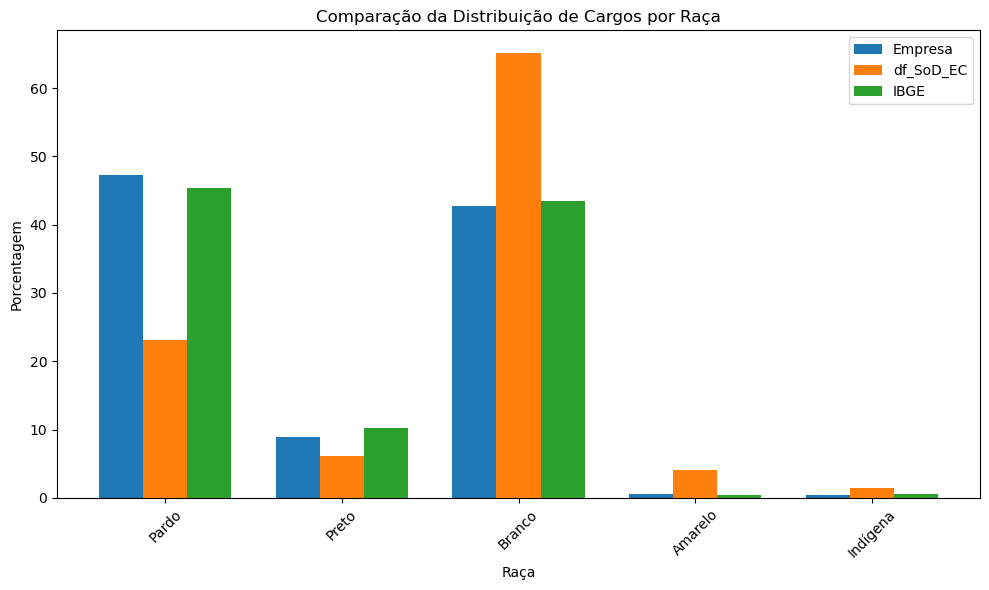

In [75]:

# Dados das bases
racas = ['Pardo', 'Preto', 'Branco', 'Amarelo', 'Indígena']
dados_empresa = [47.26, 8.96, 42.8, 0.5, 0.47]  # Valores fictícios para a distribuição de cargos na sua empresa
dados_SoD = [23.1, 6.2, 65.2, 4.1, 1.4]  # Valores fictícios para a base df_SoD_EC
dados_IBGE = [45.30, 10.20, 43.50, 0.40, 0.60]  # Valores dos dados do IBGE

# Largura das barras
bar_width = 0.25

# Posição das barras
index = np.arange(len(racas))

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras
bar1 = ax.bar(index - bar_width, dados_empresa, bar_width, label='Empresa')
bar2 = ax.bar(index, dados_SoD, bar_width, label='df_SoD_EC')
bar3 = ax.bar(index + bar_width, dados_IBGE, bar_width, label='IBGE')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Raça')
ax.set_ylabel('Porcentagem')
ax.set_title('Comparação da Distribuição de Cargos por Raça')
ax.set_xticks(index)
ax.set_xticklabels(racas)
plt.xticks(rotation=45)
plt.legend()

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [72]:
import numpy as np

# Dados do IBGE
racas = ['Pardo', 'Preto', 'Branco', 'Amarelo', 'Indígena']
dados_IBGE = [45.30, 10.20, 43.50, 0.40, 0.60]

# Dados da empresa - Raça
dados_empresa_raca = {
    'Pardo': [47.54, 45.88, 46.23, 49.94],  # Porcentagem de Pardo para os cargos Júnior, Pleno, Sênior e Gestor, respectivamente
    'Preto': [9.31, 8.64, 9.15, 7.93],      # Porcentagem de Preto para os cargos Júnior, Pleno, Sênior e Gestor, respectivamente
    'Branco': [42.28, 44.55, 43.17, 41.31], # Porcentagem de Branco para os cargos Júnior, Pleno, Sênior e Gestor, respectivamente
    'Amarelo': [0.44, 0.4, 0.55, 0.57],     # Porcentagem de Amarelo para os cargos Júnior, Pleno, Sênior e Gestor, respectivamente
    'Indígena': [0.44, 0.4, 0.55, 0.57]     # Porcentagem de Indígena para os cargos Júnior, Pleno, Sênior e Gestor, respectivamente
}

# Dados do IBGE - Gênero
porcentagem_feminino_IBGE = 51.50
porcentagem_masculino_IBGE = 48.50

# Dados da empresa - Gênero
dados_empresa_genero = {
    'Pleno': [25.73, 74.27],  # Porcentagem de Feminino e Masculino para os cargos Pleno, respectivamente
    'Júnior': [25.96, 74.04], # Porcentagem de Feminino e Masculino para os cargos Júnior, respectivamente
    'Gestor': [23.68, 76.32], # Porcentagem de Feminino e Masculino para os cargos Gestor, respectivamente
    'Sênior': [24.77, 75.23]  # Porcentagem de Feminino e Masculino para os cargos Sênior, respectivamente
}

# Calcular as proporções de raça da empresa e do IBGE
proporcoes_empresa_raca = np.array([dados_empresa_raca[raca] for raca in racas]).T / 100
proporcoes_IBGE_raca = np.array(dados_IBGE) / 100

# Calcular as proporções de gênero da empresa e do IBGE
proporcoes_empresa_genero = np.array([dados_empresa_genero[cargo] for cargo in dados_empresa_genero]) / 100
proporcoes_IBGE_genero = np.array([porcentagem_feminino_IBGE, porcentagem_masculino_IBGE]) / 100

# Calcular a diferença média absoluta para raça
diff_raca = np.abs(proporcoes_empresa_raca - proporcoes_IBGE_raca).mean()

# Calcular a diferença média absoluta para gênero
diff_genero = np.abs(proporcoes_empresa_genero - proporcoes_IBGE_genero).mean()

# Calcular o Índice de Dissimilaridade
indice_dissimilaridade = (diff_raca + diff_genero) / 2

print("Índice de Dissimilaridade:", indice_dissimilaridade)


Índice de Dissimilaridade: 0.1372625


In [73]:
import numpy as np

# Dados do IBGE
# Raças e suas respectivas porcentagens na população brasileira
racas = ['Pardo', 'Preto', 'Branco', 'Amarelo', 'Indígena']
dados_IBGE = [45.30, 10.20, 43.50, 0.40, 0.60]

# Dados da empresa - Raça
# Porcentagens de cada raça para diferentes níveis de cargo na empresa
dados_empresa_raca = {
    'Pardo': [47.54, 45.88, 46.23, 49.94],  # Júnior, Pleno, Sênior, Gestor
    'Preto': [9.31, 8.64, 9.15, 7.93],       # Júnior, Pleno, Sênior, Gestor
    'Branco': [42.28, 44.55, 43.17, 41.31],  # Júnior, Pleno, Sênior, Gestor
    'Amarelo': [0.44, 0.4, 0.55, 0.57],      # Júnior, Pleno, Sênior, Gestor
    'Indígena': [0.44, 0.4, 0.55, 0.57]      # Júnior, Pleno, Sênior, Gestor
}

# Dados do IBGE - Gênero
# Porcentagens de gênero na população brasileira
porcentagem_feminino_IBGE = 51.50
porcentagem_masculino_IBGE = 48.50

# Dados da empresa - Gênero
# Porcentagens de gênero para diferentes níveis de cargo na empresa
dados_empresa_genero = {
    'Pleno': [25.73, 74.27],  # Feminino, Masculino
    'Júnior': [25.96, 74.04], # Feminino, Masculino
    'Gestor': [23.68, 76.32], # Feminino, Masculino
    'Sênior': [24.77, 75.23]  # Feminino, Masculino
}

# Calcular as proporções de raça da empresa e do IBGE
# Transpor a matriz para que as dimensões coincidam
proporcoes_empresa_raca = np.array([dados_empresa_raca[raca] for raca in racas]).T / 100
proporcoes_IBGE_raca = np.array(dados_IBGE) / 100

# Calcular as proporções de gênero da empresa e do IBGE
proporcoes_empresa_genero = np.array([dados_empresa_genero[cargo] for cargo in dados_empresa_genero]) / 100
proporcoes_IBGE_genero = np.array([porcentagem_feminino_IBGE, porcentagem_masculino_IBGE]) / 100

# Calcular a diferença média absoluta para raça
diff_raca = np.abs(proporcoes_empresa_raca - proporcoes_IBGE_raca).mean()

# Calcular a diferença média absoluta para gênero
diff_genero = np.abs(proporcoes_empresa_genero - proporcoes_IBGE_genero).mean()

# Calcular o Índice de Dissimilaridade
indice_dissimilaridade = (diff_raca + diff_genero) / 2

# Imprimir o Índice de Dissimilaridade
print("Índice de Dissimilaridade:", indice_dissimilaridade)


Índice de Dissimilaridade: 0.1372625


In [74]:
print(f'O indice de dissimilaridade de genero é : {diff_genero}')
print(f'O indice de dissimilaridade de Raça é : {diff_raca}')

O indice de dissimilaridade de genero é : 0.26465
O indice de dissimilaridade de Raça é : 0.009874999999999998
